In [1]:
import cv2

In [2]:
ftm = cv2.imread("FtoM.jpg")

In [4]:
mtf = cv2.imread("MtoF.jpg")

In [5]:
ftm.shape

(254, 127, 3)

In [6]:
import matplotlib.pyplot as plt

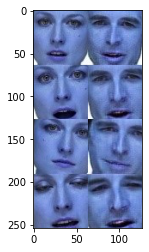

In [8]:
plt.imshow(ftm)

In [38]:
def repartir(img):
    repart = {"gauche" : [], "droite" : []}
    for k in range(4):
        repart["gauche"].append(img[k*64: k*64 +64, 0:63])
        repart["droite"].append(img[k*64: k*64 +64, 64:])
    return repart

In [39]:
r_ftm = repartir(ftm)
r_mtf = repartir(mtf)

In [60]:
import numpy as np

def get_means(imgs):
    m = [0,0]

    for i in range(4):
        m[0] += cv2.Laplacian(imgs["gauche"][i], cv2.CV_64F).var()
        m[1] += cv2.Laplacian(imgs["droite"][i], cv2.CV_64F).var()

    return np.array(m)/4



In [62]:
get_means(r_ftm)

array([1780.84181535,  944.05084098])

In [63]:
get_means(r_mtf)

array([499.75858846, 532.62502545])

# Sur la video

In [64]:
ls

blurriness.ipynb  FtoM.jpg  MtoF.jpg


In [65]:
cd ..

/home/jupyter/home/ruben/deepfake


In [66]:

ls

concat.gif                            history.csv             __pycache__/
dataset_tools.ipynb*                  metrics/                training_imgs/
dataset_tools.py*                     models/                 training_imgs2/
df_nets.ipynb*                        network.ipynb*          Untitled1.ipynb
generated_2.gif                       original_2.gif          Untitled.ipynb
generated.gif                         original.gif
haarcascade_frontalface_default.xml*  prepare dataset.ipynb*


In [67]:
cd training_imgs2/

/home/jupyter/home/ruben/deepfake/training_imgs2


In [69]:
cd ..

/home/jupyter/home/ruben/deepfake


In [76]:
import imageio

In [80]:
gens = imageio.mimread('generated_2.gif')
origs= imageio.mimread('original_2.gif')

In [78]:
def get_laplace(img):
    return cv2.Laplacian(img, cv2.CV_64F).var()

In [83]:
get_laplace(origs[0])

651.9980934447323

In [84]:
def get_means(imgs):
    m = 0
    for i in range(len(imgs)):
        m += get_laplace(imgs[i])
    return m / len(imgs)

In [85]:
get_means(gens)

310.64057316552436

In [86]:
get_means(origs)

730.7570902326371